In [70]:
import requests
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import seaborn as sns

In [3]:
csv_path = "../raw_covid_data/DS-C-19-STATES.csv"
cov_states_df  = pd.read_csv(csv_path, encoding="utf-8")

In [7]:
cov_states_df.head()

,State,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,...,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date
0,Alaska,36380,399,10,734002,1.2863,0.4081,119,59687,73205,...,21,11064,6.4,1.0,26.6,66.0,0.36,0.39,0.25,03/19/20
1,Alabama,157566,12376,504,4908621,96.9221,0.4847,1533,42334,45219,...,101,7281,8.1,1.0,62.8,59.0,0.33,0.37,0.31,03/16/20
2,Arkansas,93701,4923,102,3038999,58.4030,0.4719,732,42566,42454,...,88,7408,7.1,0.0,60.4,56.2,0.34,0.37,0.30,03/17/20
3,Arizona,220612,14566,704,7378494,64.9550,0.4713,1559,43650,48055,...,83,6452,9.7,1.0,60.3,89.8,0.33,0.36,0.30,03/16/20
4,California,1339316,81795,3334,39937489,256.3727,0.4899,7338,62586,74205,...,359,7549,12.8,9.0,59.4,95.0,0.33,0.40,0.26,03/19/20


In [101]:
total_tested = cov_states_df['Tested'].sum()
total_infected = cov_states_df['Infected'].sum()
total_deaths = cov_states_df['Deaths'].sum()
total_pop = cov_states_df['Population'].sum()
total_beds = cov_states_df['ICU Beds'].sum()
total_GDP = cov_states_df['GDP'].sum()
total_physicians = cov_states_df['Physicians'].sum()
total_hospitals = cov_states_df['Hospitals'].sum()
total_health_spending = cov_states_df['Health Spending'].sum()

state_analysis = pd.DataFrame({"State": cov_states_df['State'],
                               "Population": cov_states_df['Population'],
                               "% of Tested": (cov_states_df['Tested']/total_tested)*100,
                               "% of Infected": (cov_states_df['Infected']/total_infected)*100,
                               "% of Deaths": (cov_states_df['Deaths']/total_deaths)*100,
                               "% of Population": (cov_states_df['Population']/total_pop)*100,
                               "% of ICU Beds": (cov_states_df['ICU Beds']/total_beds)*100,
                               "% of GDP": (cov_states_df['GDP']/total_GDP)*100,
                               "% of Physicians": (cov_states_df['Physicians']/total_physicians)*100,
                               "% of Hospitals": (cov_states_df['Hospitals']/total_hospitals)*100,
                               "% of Health Spending": (cov_states_df['Health Spending']/total_health_spending)*100,
                                })

In [102]:
state_analysis

,State,Population,% of Tested,% of Infected,% of Deaths,% of Population,% of ICU Beds,% of GDP,% of Physicians,% of Hospitals,% of Health Spending
0,Alaska,734002,0.295928,0.026257,0.011654,0.221539,0.159119,2.334072,0.188999,0.404002,2.603662
1,Alabama,4908621,1.281700,0.814419,0.587378,1.481539,2.049821,1.441765,1.214071,1.943055,1.713418
2,Arkansas,3038999,0.762199,0.323964,0.118874,0.917243,0.978780,1.353606,0.711234,1.692959,1.743305
3,Arizona,7378494,1.794539,0.958535,0.820465,2.227006,2.084587,1.532188,1.771221,1.596768,1.518332
4,California,39937489,10.894491,5.382628,3.885554,12.054090,9.811866,2.365956,11.231131,6.906503,1.776486
5,Colorado,5845526,1.072411,1.479458,1.464950,1.764320,2.135398,2.036817,1.443258,1.712197,1.601167
6,Connecticut,3563077,1.509088,2.528937,4.046384,1.075422,0.901226,2.434092,1.552281,0.615621,2.320092
7,District of Columbia,720687,0.320283,0.489204,0.466173,0.217521,0.419859,6.385643,0.730731,0.192382,2.810750
8,Delaware,982895,0.358986,0.528885,0.354292,0.296661,0.248706,2.463139,0.313142,0.134667,2.413047
9,Florida,21992985,5.542060,3.006296,2.391469,6.638009,7.493281,1.540574,5.620141,4.174683,1.900504


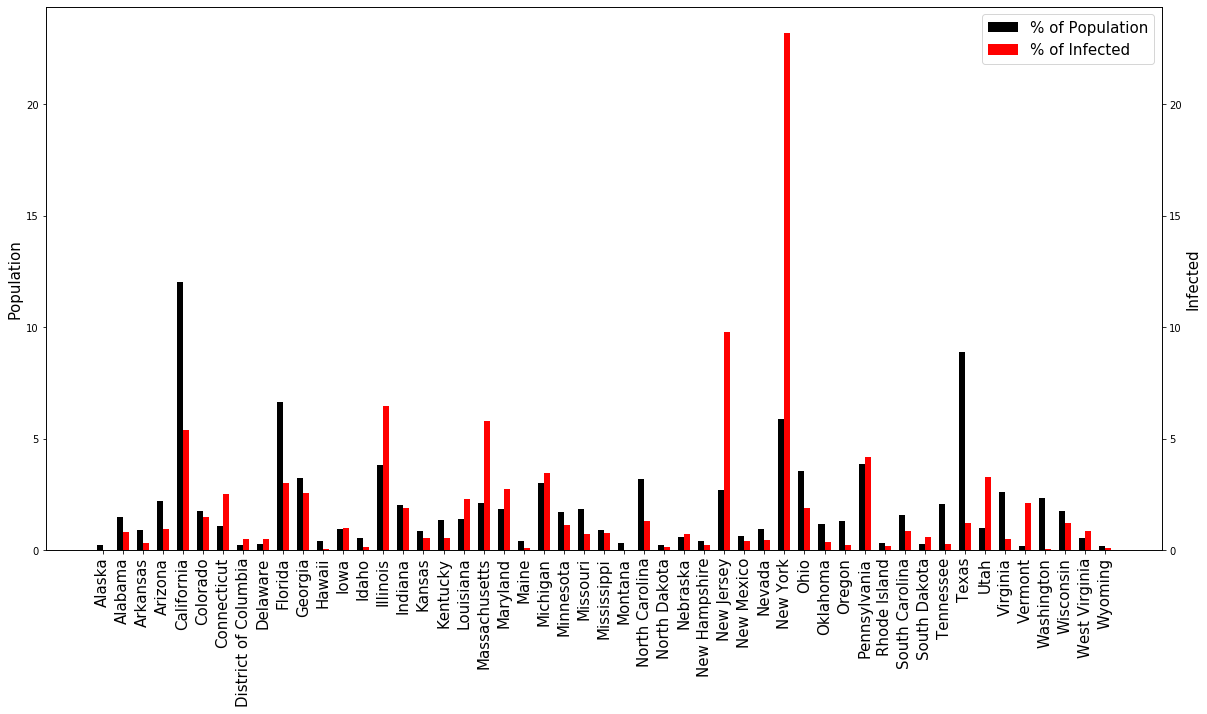

In [103]:
# set variables for plotting
pop_inf = plt.figure(figsize=(20,10))
x = np.arange(51)
ax1 = pop_inf.add_subplot(1,1,1)
w = 0.3

# will label the bars on x axis with the respective state names.
plt.xticks(x + w /2, state_analysis['State'], rotation='vertical', fontsize=15)
# plot % of population
pop =ax1.bar(x, state_analysis['% of Population'], width=w, color='black', align='center')
# plot data that share the same x axis
ax2 = ax1.twinx()
# plot % of infected
inf =ax2.bar(x + w, state_analysis['% of Infected'], width=w,color='r',align='center')

# Set legend labels
plt.legend([pop, inf],['% of Population', '% of Infected'], fontsize=15)

ax1.set_ylabel('Population', fontsize=15)
ax2.set_ylabel('Infected', fontsize=15)

# set limits
ax1.set_ylim(0,1.05*state_analysis['% of Infected'].max())
ax2.set_ylim(0,1.05*state_analysis['% of Infected'].max())

plt.show()

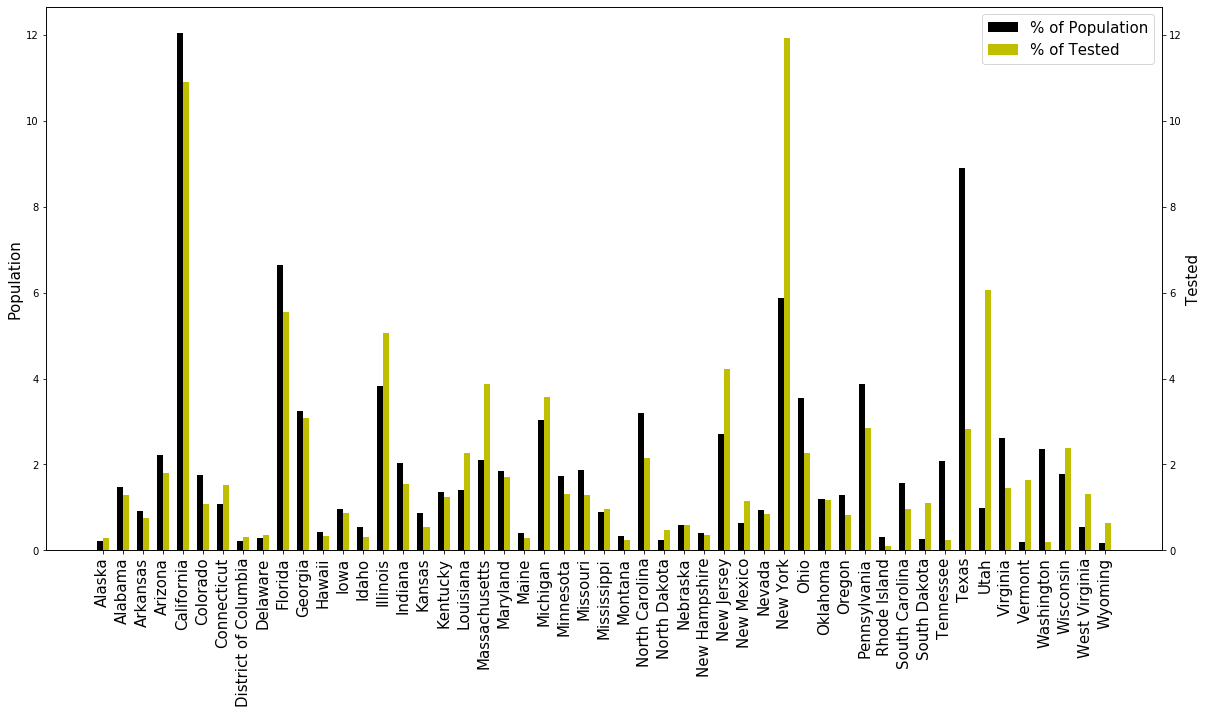

In [104]:
# set variables for plotting
pop_test = plt.figure(figsize=(20,10))
x = np.arange(51)
ax3 = pop_test.add_subplot(1,1,1)
w = 0.3

# will label the bars on x axis with the respective state names.
plt.xticks(x + w /2, state_analysis['State'], rotation='vertical', fontsize=15)
# plot % of population
pop2 =ax3.bar(x, state_analysis['% of Population'], width=w, color='black', align='center')
# plot data that share the same x axis
ax4 = ax3.twinx()
# plot % of infected
test =ax4.bar(x + w, state_analysis['% of Tested'], width=w,color='y',align='center')

# Set legend labels
plt.legend([pop2, test],['% of Population', '% of Tested'], fontsize=15)

ax3.set_ylabel('Population', fontsize=15)
ax4.set_ylabel('Tested', fontsize=15)

# set limits
ax3.set_ylim(0,1.05*state_analysis['% of Population'].max())
ax4.set_ylim(0,1.05*state_analysis['% of Population'].max())

plt.show()

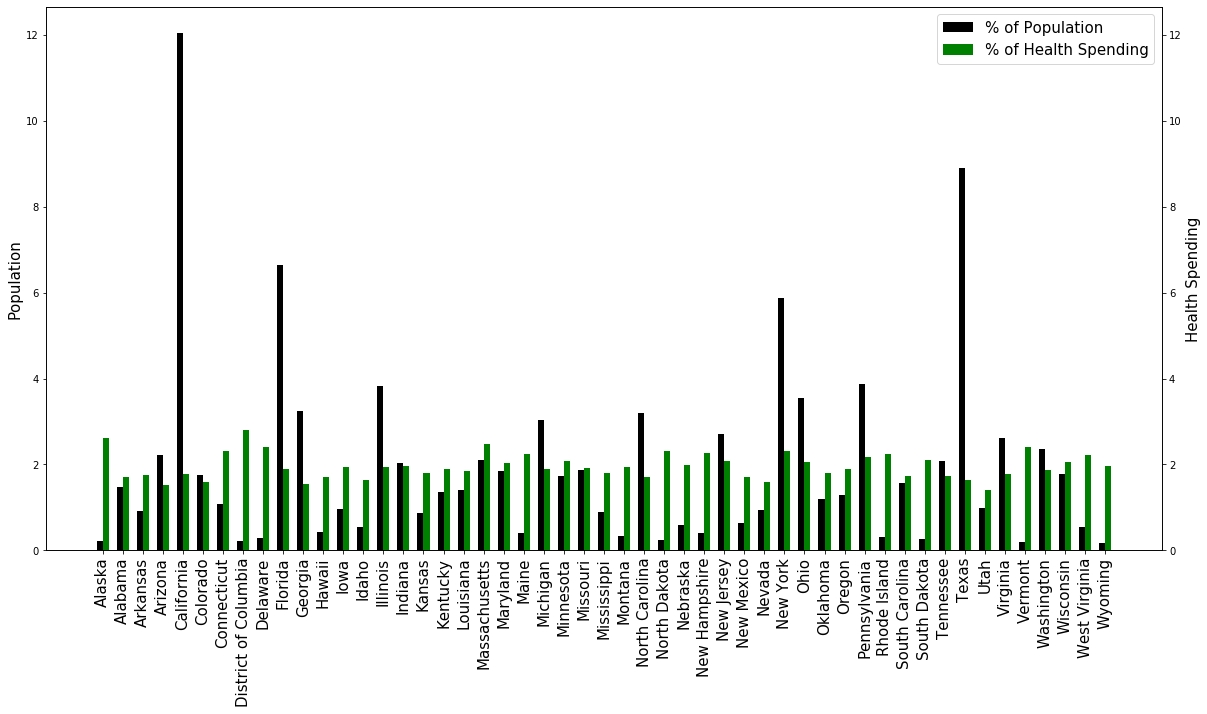

In [106]:
# set variables for plotting
pop_test = plt.figure(figsize=(20,10))
x = np.arange(51)
ax5 = pop_test.add_subplot(1,1,1)
w = 0.3

# will label the bars on x axis with the respective state names.
plt.xticks(x + w /2, state_analysis['State'], rotation='vertical', fontsize=15)
# plot % of population
pop3 =ax5.bar(x, state_analysis['% of Population'], width=w, color='black', align='center')
# plot data that share the same x axis
ax6 = ax5.twinx()
# plot % of infected
test =ax6.bar(x + w, state_analysis['% of Health Spending'], width=w,color='g',align='center')

# Set legend labels
plt.legend([pop3, test],['% of Population', '% of Health Spending'], fontsize=15)

ax5.set_ylabel('Population', fontsize=15)
ax6.set_ylabel('Health Spending', fontsize=15)

# set limits
ax5.set_ylim(0,1.05*state_analysis['% of Population'].max())
ax6.set_ylim(0,1.05*state_analysis['% of Population'].max())

plt.show()

In [110]:
new_analysis = state_analysis.set_index("State", inplace=True)

new_analysis

KeyError: "None of ['State'] are in the columns"

In [108]:
ax = new_analysis.plot.bar(rot=0)

plt.show()

AttributeError: 'NoneType' object has no attribute 'plot'

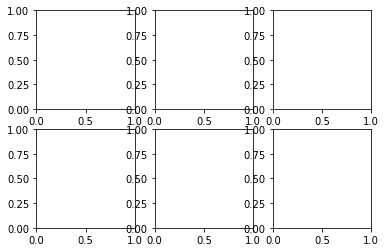

In [27]:
fig, ax = plt.subplots(2, 3,)